In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import adam_v2
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import preprocessing

In [2]:
f = pd.read_csv('forestfires.csv')
f

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
f.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
f.shape

(517, 31)

In [6]:
f1 = f.iloc[:,0:11]
forest = pd.concat([f1,f['size_category']],axis=1)
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


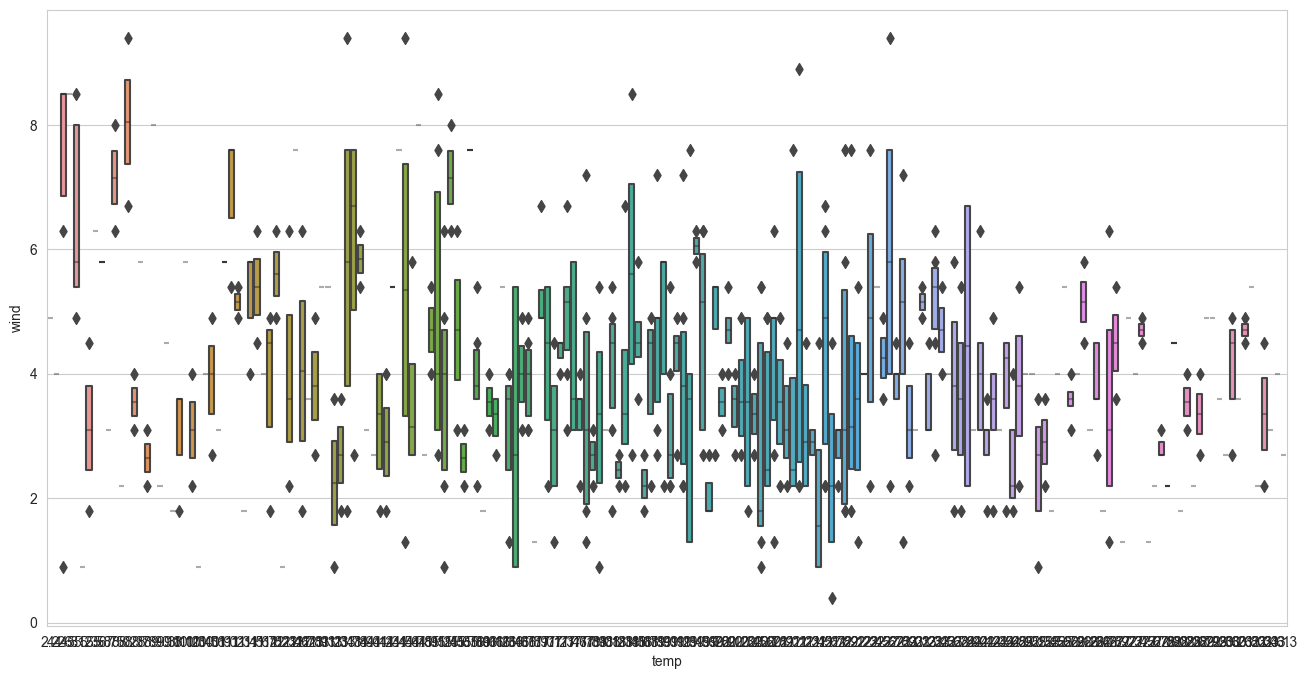

In [7]:
plt.figure(figsize = (16, 8));
sns.boxenplot(x = 'temp', y = 'wind', data = f1)
plt.show()

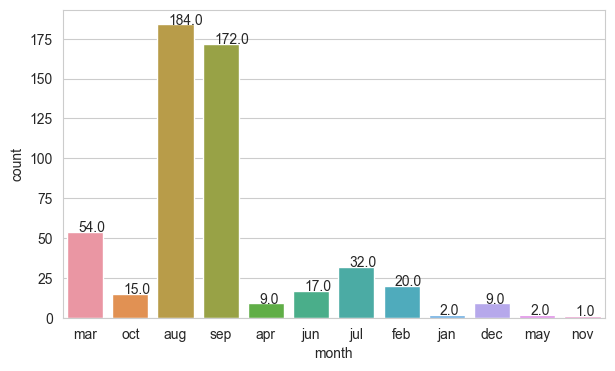

In [8]:
plt.figure(figsize=(7,4))
fig1 = sns.countplot(x= "month",data=f)
for p in fig1.patches:
   fig1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

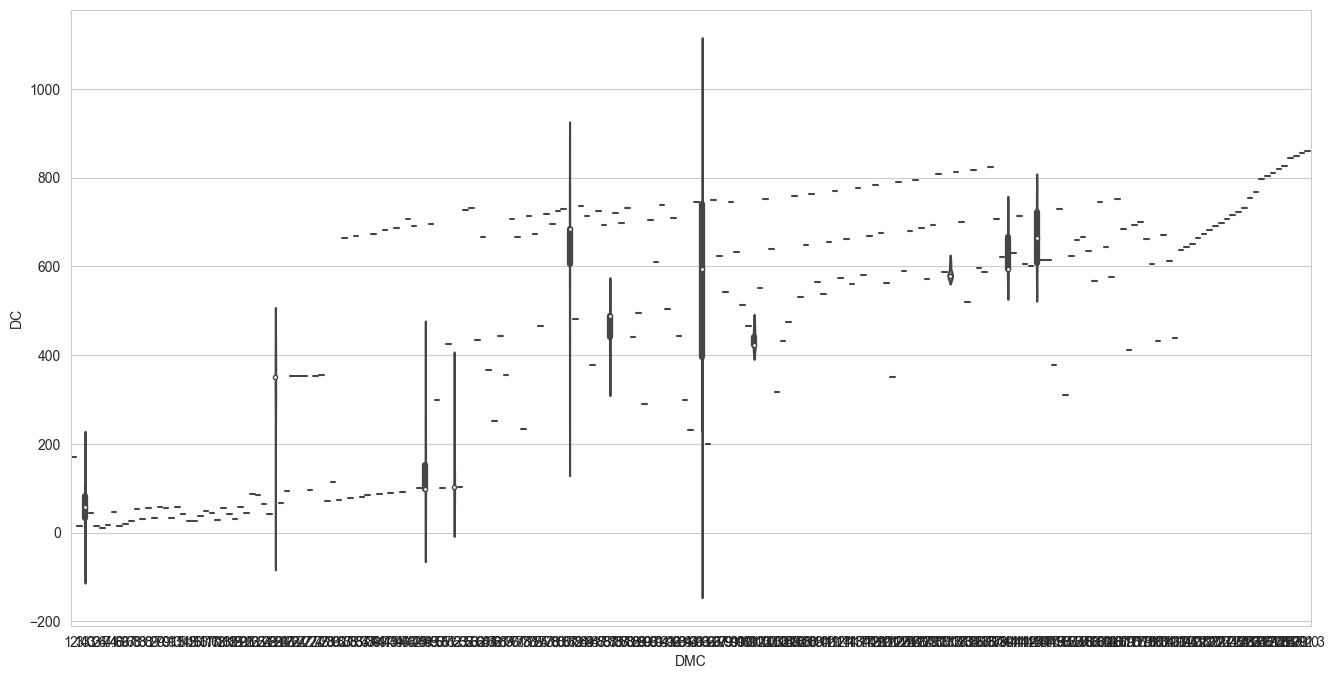

In [9]:
plt.figure(figsize = (16, 8));
fig2 = sns.violinplot(x = 'DMC', y = 'DC', data = f)
plt.show()

In [10]:
label_encoder = preprocessing.LabelEncoder()
forest['month']= label_encoder.fit_transform(forest['month']) 
forest['day']= label_encoder.fit_transform(forest['day'])
forest['size_category']= label_encoder.fit_transform(forest['size_category'])

In [11]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [12]:
x=forest.iloc[:,0:11]
y=forest.iloc[:,-1]
x.head(7)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

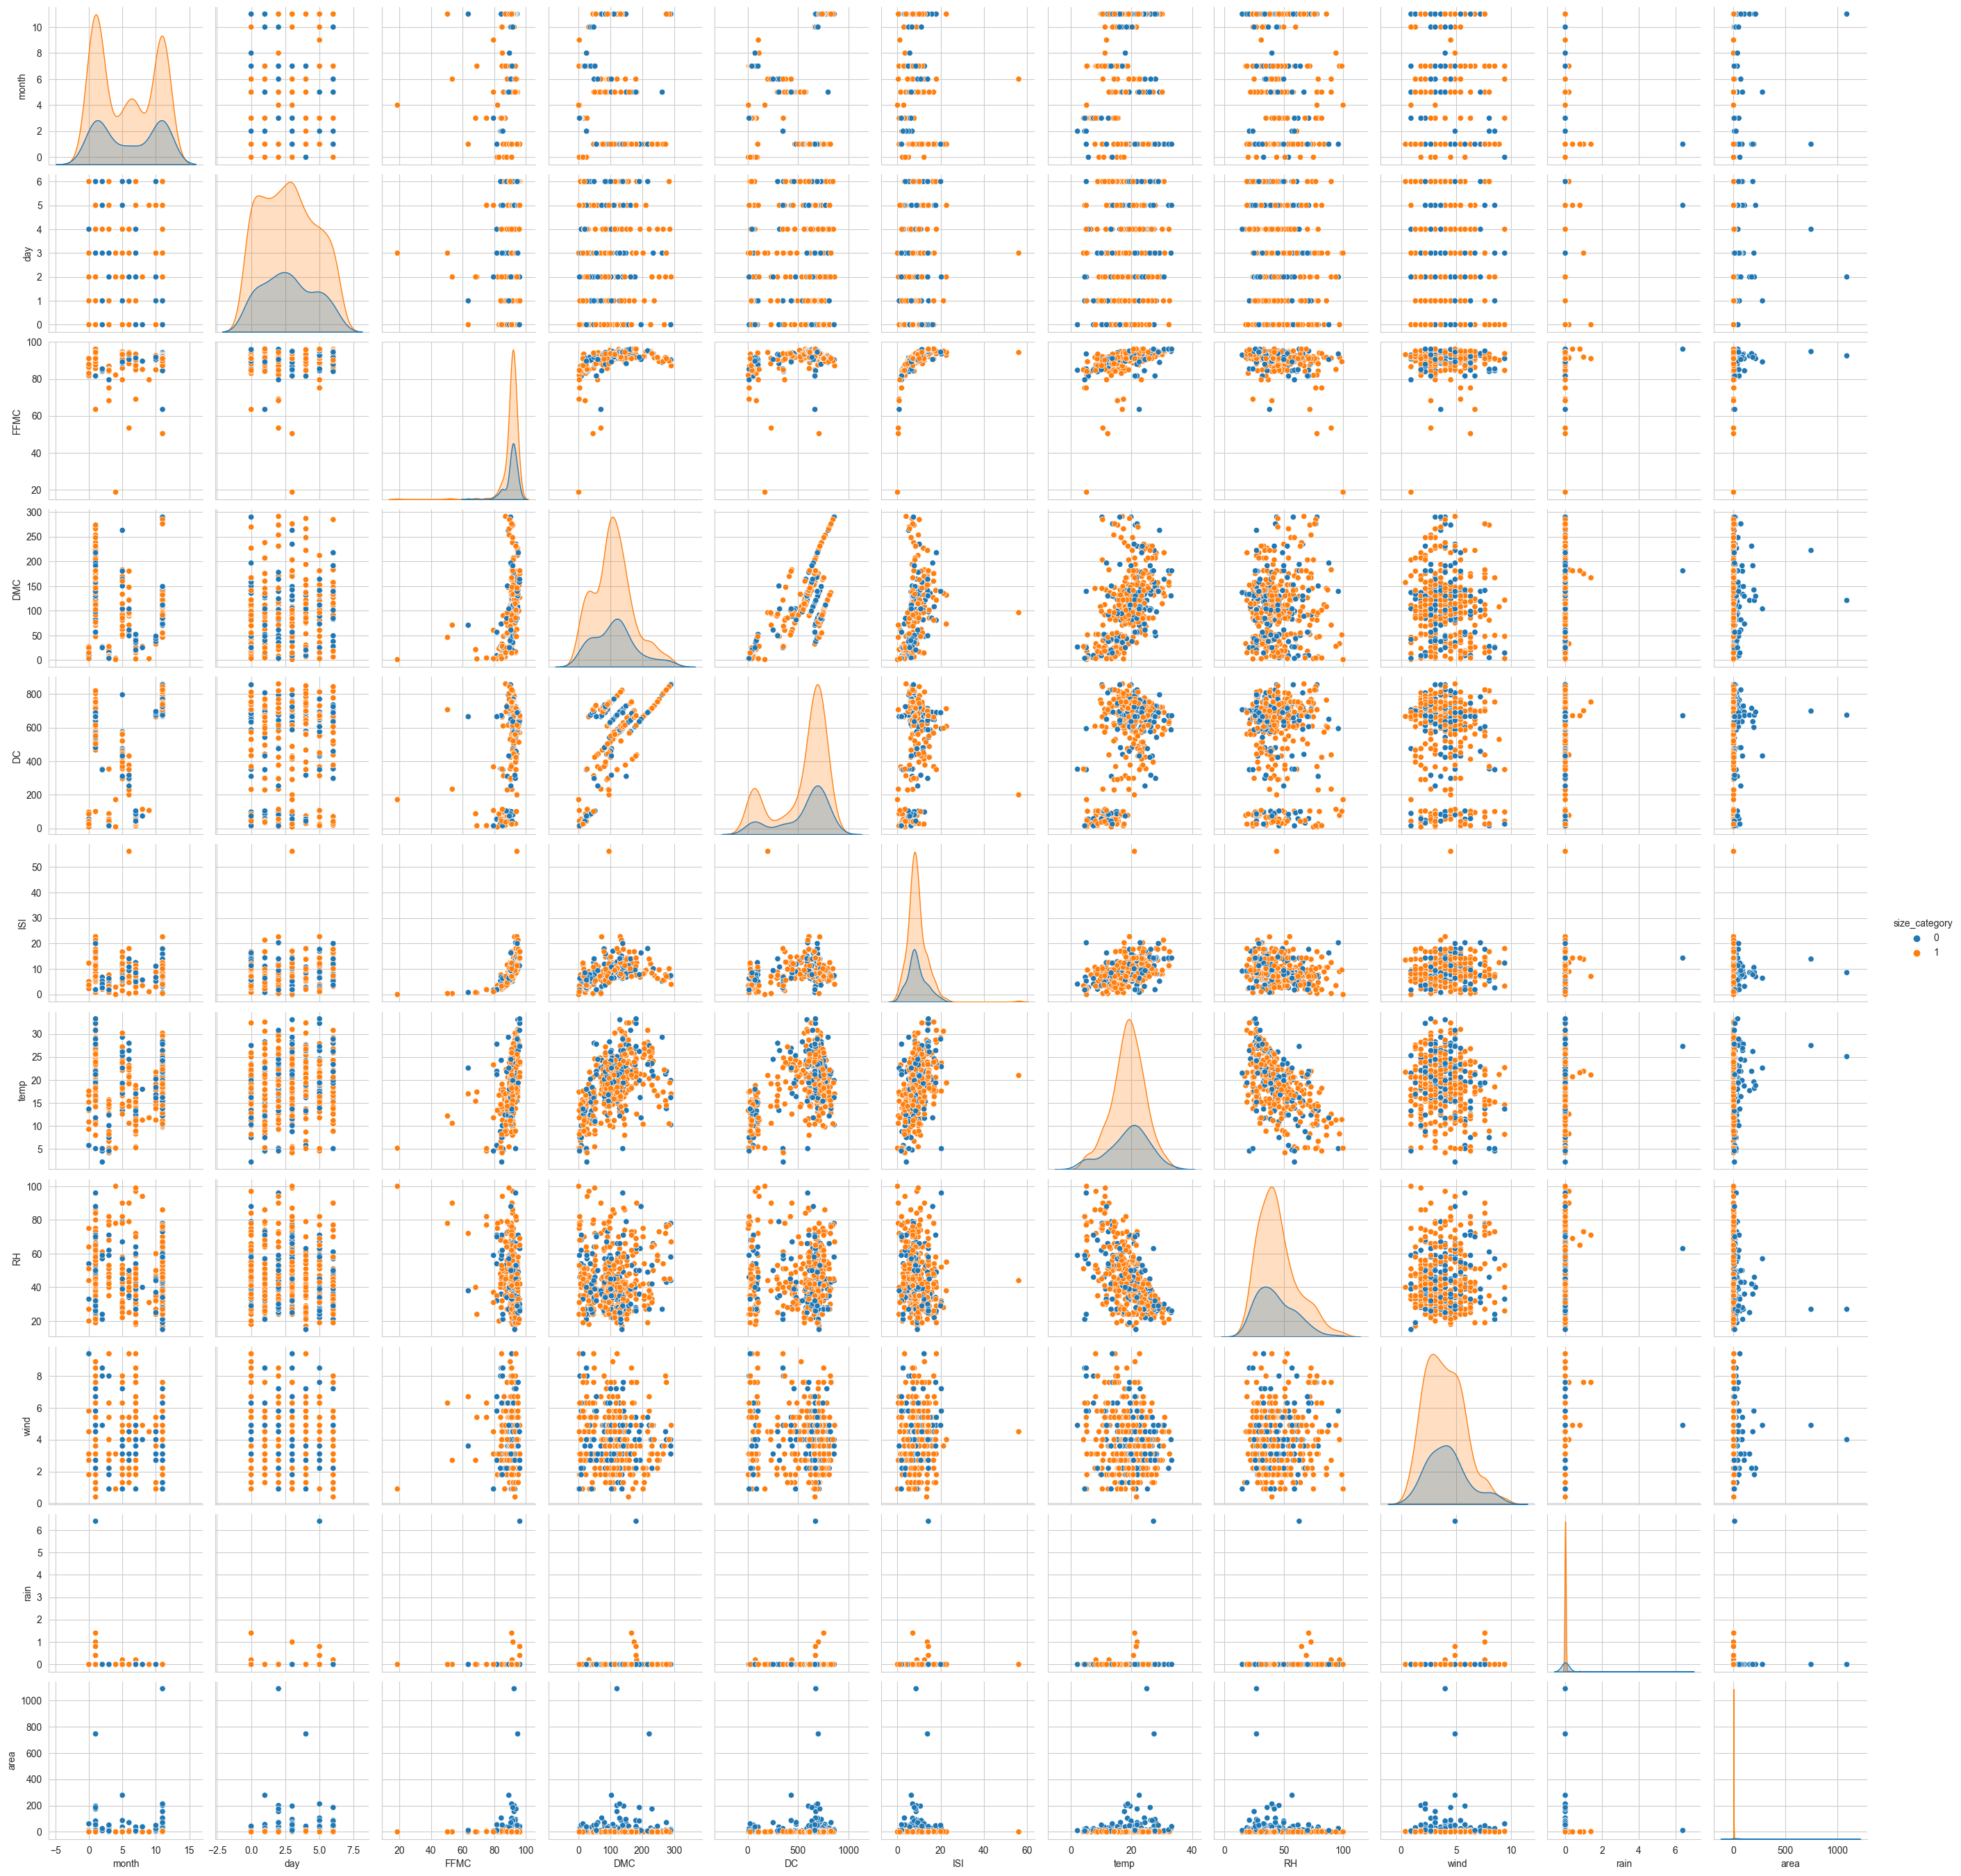

In [14]:
sns.pairplot(forest, hue='size_category')
plt.show()

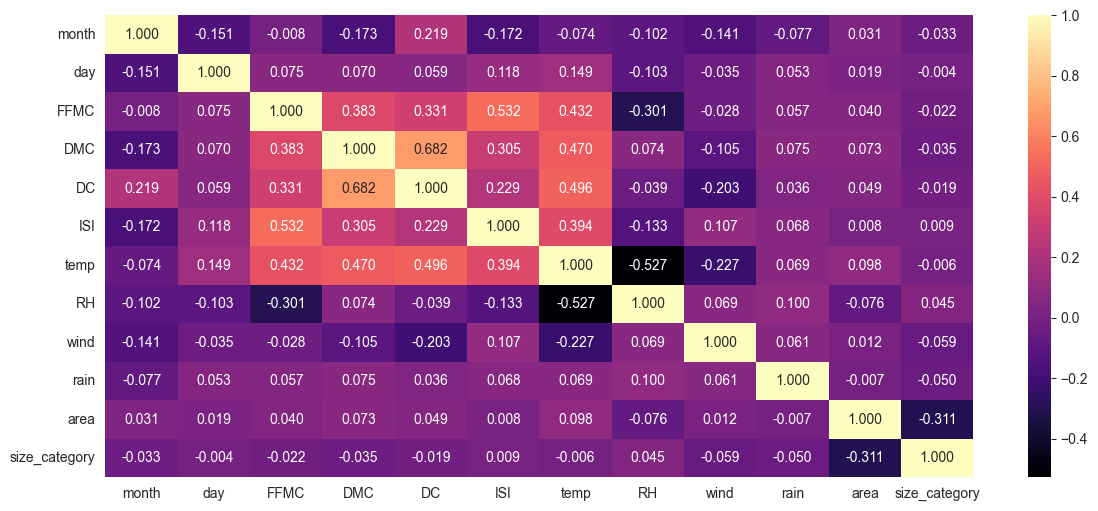

In [15]:
plt.figure(figsize = (14, 6));
sns.heatmap(forest.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

## Build Neural Network

In [16]:
np.random.seed(7)

# split into input (X) and output (Y) variables
X = forest.iloc[:,0:11]
Y = forest.iloc[:,-1]

In [17]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

### 1. Batch Size and Epochs

In [18]:
model = Sequential()
model.add(Dense(14, input_dim=11,  activation='relu')) #1st layer
model.add(Dense(11,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 16ms/step - loss: 8.9096 - accuracy: 0.5145 - val_loss: 8.8752 - val_accuracy: 0.4912
Epoch 2/250
35/35 [==============================] - 0s 6ms/step - loss: 5.8828 - accuracy: 0.5896 - val_loss: 7.3205 - val_accuracy: 0.5439
Epoch 3/250
35/35 [==============================] - 0s 7ms/step - loss: 4.6029 - accuracy: 0.5809 - val_loss: 5.9066 - val_accuracy: 0.4503
Epoch 4/250
35/35 [==============================] - 0s 6ms/step - loss: 3.5289 - accuracy: 0.6156 - val_loss: 5.0050 - val_accuracy: 0.5906
Epoch 5/250
35/35 [==============================] - 0s 6ms/step - loss: 2.7640 - accuracy: 0.6503 - val_loss: 3.7652 - val_accuracy: 0.4152
Epoch 6/250
35/35 [==============================] - 0s 6ms/step - loss: 2.0856 - accuracy: 0.6618 - val_loss: 2.9259 - val_accuracy: 0.6199
Epoch 7/250
35/35 [==============================] - 0s 6ms/step - loss: 1.3973 - accuracy: 0.7168 - val_loss: 2.2015 - val_accuracy: 0.5965
Epoch 8/250


Epoch 59/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0677 - accuracy: 0.9740 - val_loss: 0.4714 - val_accuracy: 0.8596
Epoch 60/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0652 - accuracy: 0.9682 - val_loss: 0.5391 - val_accuracy: 0.8538
Epoch 61/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0970 - accuracy: 0.9653 - val_loss: 1.0463 - val_accuracy: 0.7953
Epoch 62/250
35/35 [==============================] - 0s 7ms/step - loss: 0.1298 - accuracy: 0.9566 - val_loss: 0.4065 - val_accuracy: 0.8655
Epoch 63/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0592 - accuracy: 0.9827 - val_loss: 0.3881 - val_accuracy: 0.8713
Epoch 64/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0456 - accuracy: 0.9798 - val_loss: 0.6849 - val_accuracy: 0.8421
Epoch 65/250
35/35 [==============================] - 0s 6ms/step - loss: 0.1410 - accuracy: 0.9538 - val_loss: 0.4261 - val_accuracy: 0.8596
Epoch 

35/35 [==============================] - 0s 8ms/step - loss: 0.0435 - accuracy: 0.9884 - val_loss: 0.2332 - val_accuracy: 0.9240
Epoch 117/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9942 - val_loss: 0.3486 - val_accuracy: 0.8889
Epoch 118/250
35/35 [==============================] - 0s 8ms/step - loss: 0.0528 - accuracy: 0.9798 - val_loss: 0.2107 - val_accuracy: 0.9181
Epoch 119/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.9884 - val_loss: 0.3191 - val_accuracy: 0.9006
Epoch 120/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0660 - accuracy: 0.9769 - val_loss: 0.1904 - val_accuracy: 0.9298
Epoch 121/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0245 - accuracy: 0.9942 - val_loss: 0.6342 - val_accuracy: 0.8655
Epoch 122/250
35/35 [==============================] - 0s 6ms/step - loss: 0.1401 - accuracy: 0.9538 - val_loss: 0.2228 - val_accuracy: 0.9181
Epoch 123/250

35/35 [==============================] - 0s 7ms/step - loss: 0.0255 - accuracy: 0.9884 - val_loss: 0.1837 - val_accuracy: 0.9474
Epoch 174/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0159 - accuracy: 0.9942 - val_loss: 0.1958 - val_accuracy: 0.9415
Epoch 175/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0402 - accuracy: 0.9827 - val_loss: 0.5922 - val_accuracy: 0.8304
Epoch 176/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0775 - accuracy: 0.9855 - val_loss: 0.2185 - val_accuracy: 0.9357
Epoch 177/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.9971 - val_loss: 0.5858 - val_accuracy: 0.8830
Epoch 178/250
35/35 [==============================] - 0s 7ms/step - loss: 0.1154 - accuracy: 0.9653 - val_loss: 0.3943 - val_accuracy: 0.9006
Epoch 179/250
35/35 [==============================] - 0s 7ms/step - loss: 0.4480 - accuracy: 0.9249 - val_loss: 1.1703 - val_accuracy: 0.8596
Epoch 180/250

35/35 [==============================] - 0s 7ms/step - loss: 0.2767 - accuracy: 0.9451 - val_loss: 0.3208 - val_accuracy: 0.9006
Epoch 231/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0658 - accuracy: 0.9855 - val_loss: 0.3130 - val_accuracy: 0.9357
Epoch 232/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0757 - accuracy: 0.9769 - val_loss: 0.8153 - val_accuracy: 0.8830
Epoch 233/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0865 - accuracy: 0.9711 - val_loss: 0.1470 - val_accuracy: 0.9474
Epoch 234/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9884 - val_loss: 0.2368 - val_accuracy: 0.9474
Epoch 235/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0198 - accuracy: 0.9942 - val_loss: 0.3884 - val_accuracy: 0.9298
Epoch 236/250
35/35 [==============================] - 0s 7ms/step - loss: 0.0546 - accuracy: 0.9884 - val_loss: 0.1507 - val_accuracy: 0.9532
Epoch 237/250

In [21]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9807
accuracy: 98.07%


In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
scores

[0.0679953545331955, 0.9806576371192932]

In [24]:
# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

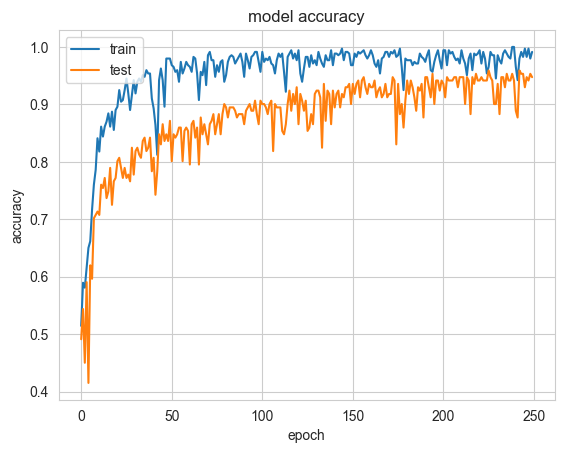

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

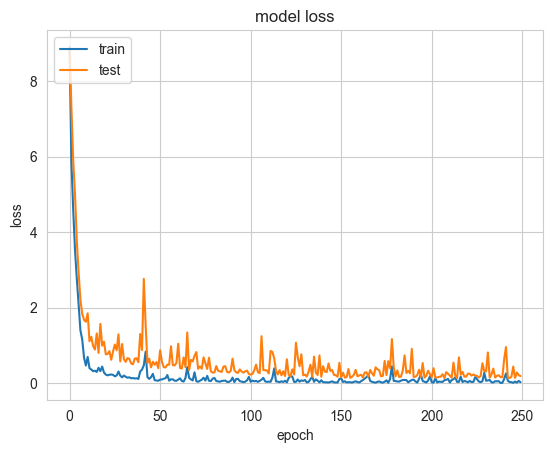

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Neural Network Hyper Parameter :

In [27]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [28]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,0.000000,5.153840e-17,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17
std,1.000969,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-1.089076,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,0.055339,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.199754,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.199754,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


#### Create model using function:

In [29]:
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=11, init='uniform', activation='relu'))
    model.add(Dense(11, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

#### Create the model:

In [30]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

C:\Users\Prakash\AppData\Local\Temp\ipykernel_11956\2900182372.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


#### Tuning of Hyperparameters using different techniques
    1. Batch Size and Epochs
    2. Learning rate and Drop out rate
    3. Activation Function and Kernel Initializer
    4. Number of Neurons in Activation layer
    5. Training model with optimum values of Hyperparameters    

### 2. Learning rate and Drop out rate

In [31]:
def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = learning_rate)

    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    
    return model


In [32]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)


C:\Users\Prakash\AppData\Local\Temp\ipykernel_11956\2440241266.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


In [33]:
# Define the grid search parameters

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,
                   dropout_rate = dropout_rate)


In [34]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Prakash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   3.1s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.837 total time=   3.1s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.806 total time=   3.1s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.845 total time=   3.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.835 total time=   2.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   2.9s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01......

[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.990 total time=   3.2s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.951 total time=   3.0s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.951 total time=   3.1s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.932 total time=   3.2s


In [35]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9747946262359619, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8643950700759888,0.06906736611964573 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9554144859313964,0.02720087682515784 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9438013434410095,0.03154356477924709 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8664115071296692,0.070269390355387 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9747946262359619,0.016940769535033515 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9535100817680359,0.03150907232034438 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8509148716926574,0.07143938490817177 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9747759461402893,0.020006065460930395 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9650672197341919,0.02577851145814052 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### Inference: The best score is 97.28 % , using 'dropout_rate': 0.2 as 'learning_rate': 0.1

#### 3. Activation Function and Kernel Initializer

In [36]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [37]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)


C:\Users\Prakash\AppData\Local\Temp\ipykernel_11956\2440241266.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


In [38]:
# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)


In [39]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   3.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   3.2s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   3.3s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   3.8s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   3.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.883 total time=   3.5s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.913 total time=   3.5s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.883 total time=   3.3s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   3.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.865 total time=   3.4s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.874 total time=   3.3s
[CV 4/5; 11/12] START activation_f

In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9244398832321167, using {'activation_function': 'tanh', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8741971611976623,0.07163812860992798 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8547983527183532,0.0789339698490875 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9244398832321167,0.038493231692730376 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9031366586685181,0.048650201812617616 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9166915655136109,0.04318766086031265 with: {'activat

Inference: The best score is 92.25 % , using 'activation_function': 'tanh' as 'init': 'uniform'

### 4. Number of Neurons in activation layer

In [41]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model


In [42]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)


C:\Users\Prakash\AppData\Local\Temp\ipykernel_11956\2440241266.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


In [43]:
# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,
                   neuron2 = neuron2)


In [44]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   3.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   3.9s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.650 total time=   3.4s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.767 total time=   3.6s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.796 total time=   3.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [45]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9109036445617675, using {'neuron1': 16, 'neuron2': 8}
0.7927184581756592,0.11462479310918386 with: {'neuron1': 4, 'neuron2': 2}
0.8043689250946044,0.10687993265728257 with: {'neuron1': 4, 'neuron2': 4}
0.8393017172813415,0.0838789763452322 with: {'neuron1': 4, 'neuron2': 8}
0.8237864136695862,0.08971525130509422 with: {'neuron1': 8, 'neuron2': 2}
0.8431852221488952,0.08313485885002928 with: {'neuron1': 8, 'neuron2': 4}
0.8722367405891418,0.06749948859114543 with: {'neuron1': 8, 'neuron2': 8}
0.8548357009887695,0.07902203902925395 with: {'neuron1': 16, 'neuron2': 2}
0.8838685631752015,0.06336060651087538 with: {'neuron1': 16, 'neuron2': 4}
0.9109036445617675,0.04557206174746735 with: {'neuron1': 16, 'neuron2': 8}


## Inference: The best score is 91.28 % , using 'neuron1': 16 and 'neuron2': 8